# Data Cleaning and Evaluation

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I start by reading in the dataframe using pd.read_csv.

In [382]:
customer_data = pd.read_csv('1345_customer_results.csv')

In [383]:
customer_data.shape

(30293, 23)

In [384]:
customer_data.head()

,Case ID,Origin,Origin Created At,Content ID,URL,Labeling State,Series,Series Index,Patch,Qualified Reads,...,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Internal Notes,Comments,Explanation
0,5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,NaN,NaN,NaN,2,...,1.000,'no',2,1.54,'yes',0,0.00,NaN,[],NaN
1,5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,NaN,NaN,NaN,3,...,1.000,'no',3,2.34,'yes',0,0.00,NaN,[],NaN
2,5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,NaN,NaN,NaN,2,...,1.000,'no',2,1.70,'yes',0,0.00,NaN,[],NaN
3,5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,NaN,NaN,NaN,1,...,1.000,'no',1,0.82,'yes',0,0.00,NaN,[],NaN
4,5888091,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,NaN,NaN,NaN,7,...,0.571,'yes',4,3.28,'no',3,2.32,NaN,[],NaN


I noticed that three columns seem to be filled with NaN data. This line of code aims to check if there are any datapoints in the columns 'Series', 'Series Index', and 'Patch' that are not an np.nan. The resulting subsetted dataframe is empty, meaning that all three columns are filled with NaN, meaning they should be dropped.

In [385]:
customer_data.loc[(customer_data['Series'].notna()) | (customer_data['Series Index'].notna()) | (customer_data['Patch'].notna())]

,Case ID,Origin,Origin Created At,Content ID,URL,Labeling State,Series,Series Index,Patch,Qualified Reads,...,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Internal Notes,Comments,Explanation


In [386]:
results_data = customer_data.drop(['Series', 'Series Index', 'Patch'], axis = 1)

Next, I know from the documentation that the Case ID value is unique to each case. For this reason, I'm going to set the Case ID as the index for the entire dataframe.

In [387]:
results_data.set_index('Case ID', inplace = True)

I see that many of the Internal Notes and Explanation values are np.nan, and the Comments are empty. I'm going to run a subsetting check to see if there is anything useful in any of those columns

In [388]:
results_data.loc[(results_data['Internal Notes'].notna()) | (results_data['Comments'] != '[]') | (results_data['Explanation'].notna())]

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Internal Notes,Comments,Explanation
Case ID,,,,,,,,,,,,,,,,,,,
5892332,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:43:57 PM,3268631,https://go.centaurlabs.com/problem/5892332,Gold Standard,1,'no','no',0.000,1.000,'no',1,0.80,'yes',0,0.00,NaN,['There was rapid and spiky rates so why am I ...,NaN
5894116,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:44:51 PM,3270415,https://go.centaurlabs.com/problem/5894116,Gold Standard,5,'no','yes',1.000,1.000,'yes',5,4.00,'no',0,0.00,NaN,['Can someone explain why the answer is “no”?'],NaN
5896433,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:46:04 PM,3272732,https://go.centaurlabs.com/problem/5896433,Gold Standard,3,'yes','no',1.000,1.000,'no',3,2.32,'yes',0,0.00,NaN,['??'],NaN
5899520,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:47:40 PM,3275819,https://go.centaurlabs.com/problem/5899520,Gold Standard,2,'yes','no',1.000,1.000,'no',2,1.58,'yes',0,0.00,NaN,"[""i can't see any spike in this question so wh...",NaN
5900998,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:48:26 PM,3277297,https://go.centaurlabs.com/problem/5900998,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.56,'no',0,0.00,NaN,['There is obviously a peak happened in there'],NaN
5901914,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:48:54 PM,3278213,https://go.centaurlabs.com/problem/5901914,Gold Standard,6,'yes','no',1.000,1.000,'no',6,4.72,'yes',0,0.00,NaN,['No spike present'],NaN
5902040,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:48:58 PM,3278339,https://go.centaurlabs.com/problem/5902040,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.58,'no',0,0.00,NaN,['How?'],NaN
5904120,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:53:07 PM,3280419,https://go.centaurlabs.com/problem/5904120,Gold Standard,1,'yes','no',1.000,1.000,'no',1,0.78,'yes',0,0.00,NaN,['How? '],NaN
5904413,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:53:16 PM,3280712,https://go.centaurlabs.com/problem/5904413,Gold Standard,3,'yes','no',1.000,1.000,'no',3,2.46,'yes',0,0.00,NaN,['Multiple?'],NaN


I'm glad I checked. There are multiple rows with comments that are worth checking. It also seems like where there are comments, there is some disagreement between answer choices. However, I don't see anything worthwhile in Internal Notes or Explanations, so I will drop those.

In [389]:
results_data.drop(['Internal Notes', 'Explanation'], axis = 1, inplace = True)

Next, I want to be able to sort out all the links in the 'Origin' column that either do not end with a Vote[N] or the [N] is a number that is not between 0 and 8 (e.g. 9). This N represents the number of experts that voted 'yes' to whether there was an abnormality in the medical image or not. I also have to consider the case where N = 4, meaning that the vote was split half in half. 

First, I'll subset a few of the links to get a good look at them:

In [390]:
results_data['Origin'].iloc[0]

'https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B14_time139137_medoid_vote2.jpg'

In [391]:
results_data['Origin'].iloc[1]

'https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B10_time178433_medoid_vote0.jpg'

In [392]:
results_data['Origin'].iloc[4000]

'https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/P10056_time115915_member_vote4.jpg'

In [393]:
from re import fullmatch

In [394]:
mask = results_data['Origin'].str.fullmatch(r'(.*)vote[0-8](.*)', case = False)
#creates a mask of where this is true and where it is not

Here, I'll use a mask to create a new dataset which is confirmed to have voting data. Then, I'll take a look at the data:

In [395]:
refined_data = results_data[mask]

In [484]:
refined_data.head()

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,...,Second Choice Votes,Second Choice Weight,Comments,Experts Voted Yes,%Experts Voted Yes,%Readers Voted Yes,Crowd Accuracy,Reader Accuracy,Expert Accuracy,correct answer
Case ID,,,,,,,,,,,,,,,,,,,,,
5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,2,'no','no',0.0,1.000,...,0,0.00,[],2,0.25,0.000000,1,1.0,0.75,'no'
5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,3,'no','no',0.0,1.000,...,0,0.00,[],0,0.00,0.000000,1,1.0,1.00,'no'
5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,2,'no','no',0.0,1.000,...,0,0.00,[],0,0.00,0.000000,1,1.0,1.00,'no'
5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,1,'no','no',0.0,1.000,...,0,0.00,[],0,0.00,0.000000,1,1.0,1.00,'no'
5888091,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,7,NaN,'yes',NaN,0.571,...,3,2.32,[],4,0.50,0.571429,0,0.5,0.50,'yes'


Next, I understand that I'm going to be taking a look at the special case where the votes are equal. I've decided to subset this by using the same regex expression but using the specific case of "vote4". I used the mask approach to create a subsetted dataframe, which I will examine. 

In [397]:
equal_votes = refined_data['Origin'].str.fullmatch(r'(.*)vote4(.*)', case = False)

In [398]:
equal_votes_data = refined_data.loc[equal_votes]

In [399]:
equal_votes_data.head()

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Comments
Case ID,,,,,,,,,,,,,,,,,
5888091,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,[]
5888782,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:42:06 PM,3265081,https://go.centaurlabs.com/problem/5888782,In Progress,5,NaN,'no',NaN,1.000,'no',5,3.94,'yes',0,0.00,[]
5891822,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:43:42 PM,3268121,https://go.centaurlabs.com/problem/5891822,In Progress,5,NaN,'yes',NaN,0.800,'yes',4,3.10,'no',1,0.76,[]
5891960,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:43:46 PM,3268259,https://go.centaurlabs.com/problem/5891960,In Progress,7,NaN,'no',NaN,1.000,'no',7,5.53,'yes',0,0.00,[]
5891979,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:43:47 PM,3268278,https://go.centaurlabs.com/problem/5891979,In Progress,8,NaN,'no',NaN,0.625,'no',5,3.92,'yes',3,2.38,[]


In [400]:
equal_votes_data['Labeling State'].unique() 
#Notice that the only 'Labeling State' option for when the votes are split 4-4 is "In Progress",
#indicating that the data is not ready for "Gold Standard". 

array(['In Progress'], dtype=object)

The task is to vette these labels and find a way to break the tie and turn them into "Gold Standard" labels. How are we supposed to do that? To label the medical images, we can use the qualified reads we are given in the data to break the tie. However, we need to prove that the crowdsourced data is reliable. This is where the idea comes in of showing that the crowd agrees with experts more than experts do with each other. 

I will start with this by creating columns that represent the number of experts that vote "yes". The origin link is helpful because I can source that number straight from there. 

In [401]:
import re

In [402]:
def calculate_experts(string = refined_data['Origin']):
    substring = re.search(r'vote[0-8]', string)
    return int(substring.group()[-1])
    

In [403]:
refined_data['Experts Voted Yes'] = refined_data['Origin'].apply(calculate_experts)

C:\Users\micha\AppData\Local\Temp\ipykernel_186764\4030270293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data['Experts Voted Yes'] = refined_data['Origin'].apply(calculate_experts)


In [404]:
refined_data.head()
#Across the cases, calculate percentage of qualified readers that vote 'yes' out of total people vs. percentage of experts 
#that vote yes out of total experts
#On a graph, show clumps of data and try to find a line of best fit

#If I want to gauge the accuracy, use heuristic to weigh their accuracy. 5 voters, say one voter has 90% accuracy,
#another has 80% accuracy, 

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Comments,Experts Voted Yes
Case ID,,,,,,,,,,,,,,,,,,
5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,2,'no','no',0.0,1.000,'no',2,1.54,'yes',0,0.00,[],2
5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,3,'no','no',0.0,1.000,'no',3,2.34,'yes',0,0.00,[],0
5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,2,'no','no',0.0,1.000,'no',2,1.70,'yes',0,0.00,[],0
5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,1,'no','no',0.0,1.000,'no',1,0.82,'yes',0,0.00,[],0
5888091,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,[],4


I've successfully created a column that directly tells us the amount of experts that voted yes. How can I use this to my advantage?

I think it will be helpful to analyze not just whether a label is 'yes' or 'no' but the amount of people that say 'yes' versus the total amount of people. This will allow me to convert the answers from simple binary data to continuous percentages. If I do this for both the experts (experts that say yes / total experts) and the qualified readers (n in crowd that say yes / total readers), then I can compare how much the readers agree with the experts. Otherwise, I wouldn't be able to quantify the amount that the crowd agrees with the experts.

Now I need to figure out a way to create those two columns:

In [405]:
refined_data['%Experts Voted Yes'] = refined_data['Experts Voted Yes']/8
#Here I create my percent column of experts voting yes

C:\Users\micha\AppData\Local\Temp\ipykernel_186764\1665384837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data['%Experts Voted Yes'] = refined_data['Experts Voted Yes']/8


Creating the column of user percentages will be a bit harder just because of the way that the data is structured.

In [406]:
def percent_user_yes(data):
    if data['Majority Label'] == "'yes'":
        percent_value = data['First Choice Votes']/data['Qualified Reads']
    elif data['Majority Label'] == "'no'":
        percent_value = data['Second Choice Votes']/data['Qualified Reads']
    else:
        percent_value = np.nan
    return percent_value

#majority = refined_data['Majority Label'], firstc = refined_data['First Choice Votes'], secondc = refined_data['Second Choice Votes'], qualf = refined_data['Qualified Reads']

In [407]:
refined_data['%Readers Voted Yes'] = refined_data.apply(percent_user_yes, axis = 1)

C:\Users\micha\AppData\Local\Temp\ipykernel_186764\4169622662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data['%Readers Voted Yes'] = refined_data.apply(percent_user_yes, axis = 1)


Next, I want to create a column to eventually calculate Crowd Accuracy.

In [408]:
def accuracy(data):
    if data['Qualified Reads'] == 4:
        acc_value = 0.5
    if data['Majority Label'] == data['Correct Label']:
        acc_value = 1
    elif data['Majority Label'] == np.nan or data['Correct Label'] == np.nan:
        acc_value = np.nan
    elif data['Majority Label'] != data['Correct Label']:
        acc_value = 0
    return acc_value

In [409]:
refined_data['Crowd Accuracy'] = refined_data.apply(accuracy, axis = 1)

C:\Users\micha\AppData\Local\Temp\ipykernel_186764\4031586605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data['Crowd Accuracy'] = refined_data.apply(accuracy, axis = 1)


In [410]:
def reader_accuracy(data):
    if data['Qualified Reads'] > 0:
        if (data['Experts Voted Yes'] == 4):        
            readera = 0.5
        elif data['Majority Label'] == data['Correct Label']:
            readera = data['First Choice Votes']/data['Qualified Reads']
        elif (data['Majority Label'] != data['Correct Label']):
            readera = data['Second Choice Votes']/data['Qualified Reads']
    else:
        readera = np.nan
    return readera

In [411]:
refined_data['Reader Accuracy'] = refined_data.apply(reader_accuracy, axis = 1)

C:\Users\micha\AppData\Local\Temp\ipykernel_186764\2690651648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data['Reader Accuracy'] = refined_data.apply(reader_accuracy, axis = 1)


In [412]:
def expert_accuracy(data):
    if data['Correct Label'] == "'yes'":
        experta = data['%Experts Voted Yes']
    elif data['Correct Label'] == "'no'":
        experta = 1 - data['%Experts Voted Yes']
    else:
        experta = 0.5
    return experta

In [413]:
refined_data['Expert Accuracy'] = refined_data.apply(expert_accuracy, axis = 1)

C:\Users\micha\AppData\Local\Temp\ipykernel_186764\2016565814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data['Expert Accuracy'] = refined_data.apply(expert_accuracy, axis = 1)


I've created a dataset named "refined_data" where I've thrown out columns that I don't find useful and added columns that I can use to compare expert agreement and reader agreement.

In [414]:
refined_data.head()

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,...,Second Choice Answer,Second Choice Votes,Second Choice Weight,Comments,Experts Voted Yes,%Experts Voted Yes,%Readers Voted Yes,Crowd Accuracy,Reader Accuracy,Expert Accuracy
Case ID,,,,,,,,,,,,,,,,,,,,,
5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,2,'no','no',0.0,1.000,...,'yes',0,0.00,[],2,0.25,0.000000,1,1.0,0.75
5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,3,'no','no',0.0,1.000,...,'yes',0,0.00,[],0,0.00,0.000000,1,1.0,1.00
5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,2,'no','no',0.0,1.000,...,'yes',0,0.00,[],0,0.00,0.000000,1,1.0,1.00
5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,1,'no','no',0.0,1.000,...,'yes',0,0.00,[],0,0.00,0.000000,1,1.0,1.00
5888091,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,7,NaN,'yes',NaN,0.571,...,'no',3,2.32,[],4,0.50,0.571429,0,0.5,0.50


In [415]:
#stripped_data = refined_data.loc[(refined_data['%Readers Voted Yes'] != 1) & (refined_data['%Readers Voted Yes'] != 0)]
#filtering out the 1 and 0 agreements since there are so many of them and having so many is uninstructive

Here we can see that we've successfully created two columns: one that calculates the % of experts that agree on 'yes', and one that calculates the % of qualified readers (in other words, the crowd) that agree on 'yes'. With this data, it's time to finally move into Exploratory Data Analysis.

## Exploratory Data Analysis 1
Here I'm going to compare the percentage of experts that say "yes" to the percentage of readers that say "yes". The goal of this is to show where the experts agree with the readers and how often. I will use a scatterplot to see if there is a correlation between agreement of the readers and agreement of the experts. 

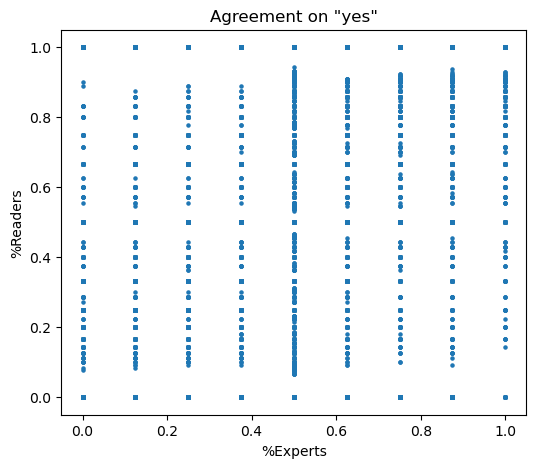

In [416]:
plt.figure(figsize = (6,5))

plt.scatter(refined_data['%Experts Voted Yes'], refined_data['%Readers Voted Yes'], s = 5)
plt.title('Agreement on "yes"')

plt.xlabel('%Experts')
plt.ylabel('%Readers')

plt.show()

We've run into an issue with the data. It seems that there is no pattern in any of the data, and there seems to be nothing useful we can really extrapolate. It looks like there is no correlation between the times that the crowd agrees and the time that the experts agree. Maybe we have to start checking to make sure that there are _enough_ qualified reads on a label. I will start by checking the case where there are 5 or more qualified reads and see if that helps accuracy. 

In [417]:
above_five_reads = refined_data.loc[refined_data['Qualified Reads'] >= 5]

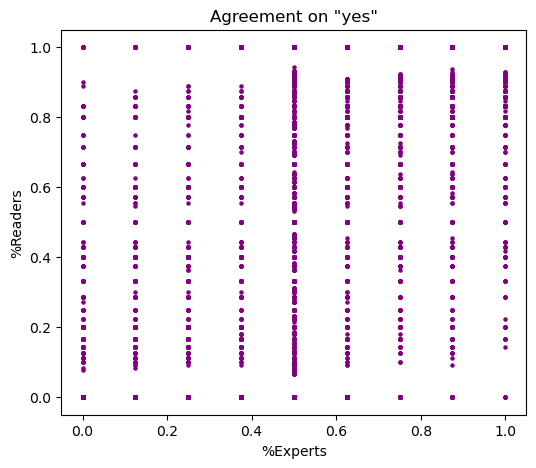

In [418]:
plt.figure(figsize = (6,5))

plt.scatter(above_five_reads['%Experts Voted Yes'], above_five_reads['%Readers Voted Yes'], s = 5, color = 'purple')
plt.title('Agreement on "yes"')

plt.xlabel('%Experts')
plt.ylabel('%Readers')

plt.show()

Hmmm...this still looks very similar to the scatterplot we had before where there is no pattern. However, let's try visualizing crowd agreement at _each point_ of the expert data, seeing as the expert agreement percentages can be considered discretes since they are all fractions of eight (e.g., 0, 0.125, 0.25, etc.). 

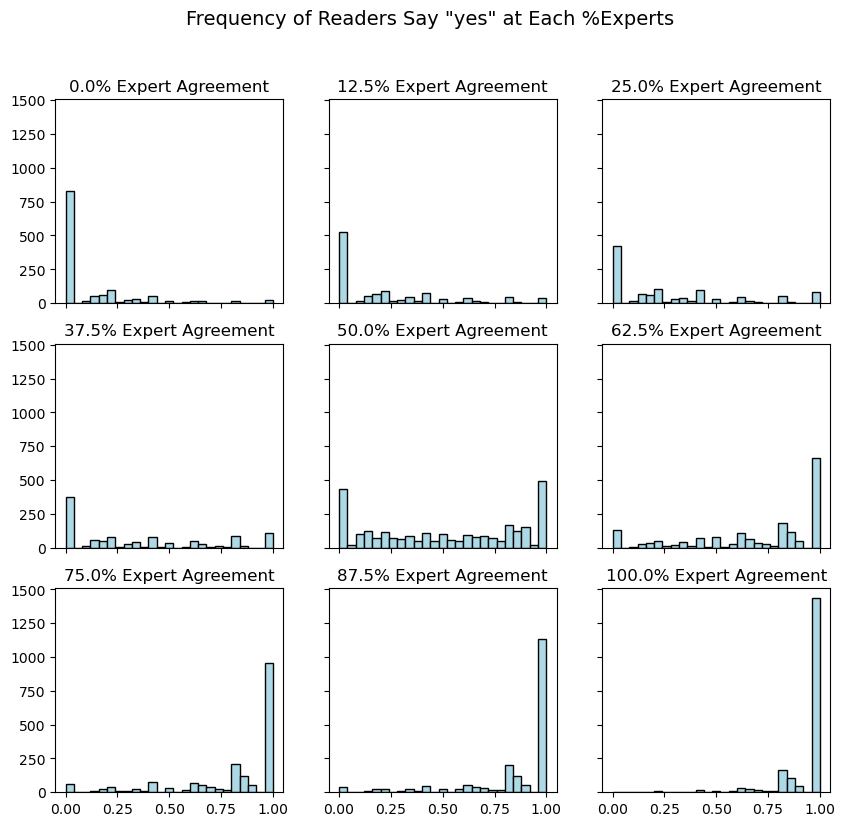

In [419]:
import itertools
fig, axs = plt.subplots(3,3, sharex = True, sharey = True, figsize = (10,9))
iteration = list(np.linspace(0, 1, 9))

coordinates = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]
plt.suptitle('Frequency of Readers Say "yes" at Each %Experts', fontsize = 14)
#print(iteration)

for i, position in zip(iteration, coordinates):
    data_at_each_expert = above_five_reads.loc[above_five_reads['%Experts Voted Yes'] == i]
    axs[position].hist(data_at_each_expert['%Readers Voted Yes'], color = '#add8e6', bins = 25, edgecolor = 'k')
    axs[position].set_title(str(i*100) + '% Expert Agreement')
    #data_at_each_expert = above_five_reads.loc[stripped_data['%Experts Voted Yes'] == 1] 

    #plt.figure(figsize = (8,7))
    #plt.hist(test['%Readers Voted Yes'], bins = 20, color = 'black')
    #plt.show()

I will aggregate the same information into a concise violinplot and the conclusion will become more clear:

In [420]:
#same information using a violin plot

Text(0.5, 1.0, 'Proportion of Readers that Vote "yes" At Each Proportion of Experts')

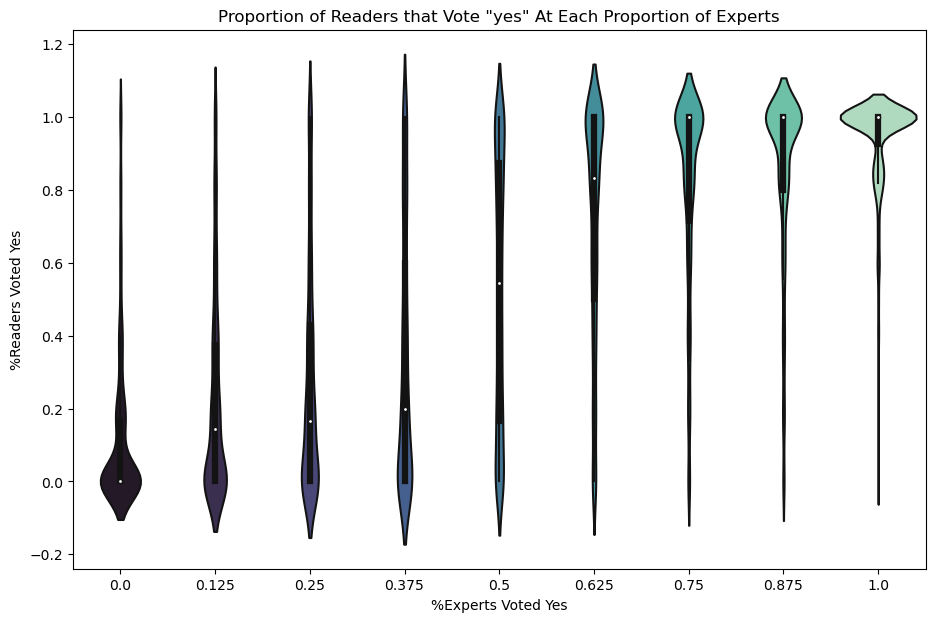

In [421]:
plt.figure(figsize = (11,7))
sns.violinplot(data = above_five_reads, x = '%Experts Voted Yes', y = '%Readers Voted Yes', palette = 'mako')
plt.title('Proportion of Readers that Vote "yes" At Each Proportion of Experts')

The violin plot and the histograms make it clear: the crowd is certainly divided and all over the place when it comes to cases where the experts are split 50-50. This seems like bad news because if the crowd answers are in disarray, then it becomes difficult to know what to rely on to break the tie.

Yet, these visualizations still show us that when there are more Qualified Readers (at least 5), the percent of readers that answer "yes" actually correlates fairly well with the amount of experts that say "yes". I imagine that this correlation will only become more clear as we increase the threshold of Qualified Readers. 
### In essence, we can say that Qualified Readers agree with Experts, but their agreement is only reliable when there are multiple Qualified Readers to give their opinion on a medical image.

Consider this histogram matrix where we __do not__ filter out for number of Qualified Readers. Though there is an overwhelming majority still for the correct answer, there remains a significant minority of images that are given an incorrect label by Readers. For example, consider the plot at (0,2) where only 25% of Experts responded 'yes'. Though in the majority of instances readers also voted no, there remains almost 500 instances where readers voted 'yes' unanimously.

In [422]:
import itertools
#fig, axs = plt.subplots(3,3, sharex = True, sharey = True, figsize = (10,9))
#iteration = list(np.linspace(0, 1, 9))

#coordinates = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]
#lt.suptitle('Proportion of Readers Say "yes" at Each %Experts', fontsize = 14)
#print(iteration)

'''for i, position in zip(iteration, coordinates):
    data_at_each_expert = refined_data.loc[refined_data['%Experts Voted Yes'] == i]
    axs[position].hist(data_at_each_expert['%Readers Voted Yes'], color = 'pink', bins = 25, edgecolor = 'black')
    axs[position].set_title(str(i*100) + '% Experts Say Yes')'''

"for i, position in zip(iteration, coordinates):\n    data_at_each_expert = refined_data.loc[refined_data['%Experts Voted Yes'] == i]\n    axs[position].hist(data_at_each_expert['%Readers Voted Yes'], color = 'pink', bins = 25, edgecolor = 'black')\n    axs[position].set_title(str(i*100) + '% Experts Say Yes')"

# Exploring Crowd Reader Accuracy

In [423]:
refined_data.describe()

,Content ID,Qualified Reads,Difficulty,Agreement,First Choice Votes,First Choice Weight,Second Choice Votes,Second Choice Weight,Experts Voted Yes,%Experts Voted Yes,%Readers Voted Yes,Crowd Accuracy,Reader Accuracy,Expert Accuracy
count,2.700000e+04,27000.000000,23758.000000,26758.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,26758.000000,27000.000000,26758.000000,27000.000000
mean,3.281098e+06,5.110370,0.244252,0.881257,4.474333,3.574407,0.636037,0.505636,4.000000,0.500000,0.541278,0.691741,0.727078,0.777778
std,7.944370e+03,2.549289,0.334227,0.163590,2.360711,1.888224,0.959345,0.764048,2.582037,0.322755,0.412823,0.461783,0.325106,0.164339
min,3.264386e+06,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,3.274429e+06,3.000000,0.000000,0.750000,3.000000,2.340000,0.000000,0.000000,2.000000,0.250000,0.000000,0.000000,0.500000,0.625000
50%,3.281178e+06,5.000000,0.000000,1.000000,4.000000,3.220000,0.000000,0.000000,4.000000,0.500000,0.600000,1.000000,0.857143,0.750000
75%,3.287928e+06,7.000000,0.429000,1.000000,6.000000,4.780000,1.000000,0.800000,6.000000,0.750000,1.000000,1.000000,1.000000,0.875000
max,3.294678e+06,18.000000,1.000000,1.000000,18.000000,14.400000,8.000000,6.420000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [424]:
experts = np.linspace(0,1,9)
experts

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])

In [425]:
experts
crowd_list = []
for i in experts:
    crowd_accuracy = refined_data.loc[refined_data['%Experts Voted Yes'] == i]['Crowd Accuracy'].mean()
    crowd_list.append(crowd_accuracy)
    print('The crowd accuracy at ' +str(i)+ ' proportion of experts vote yes is ' +str(crowd_accuracy))

The crowd accuracy at 0.0 proportion of experts vote yes is 0.885
The crowd accuracy at 0.125 proportion of experts vote yes is 0.7393333333333333
The crowd accuracy at 0.25 proportion of experts vote yes is 0.685
The crowd accuracy at 0.375 proportion of experts vote yes is 0.612
The crowd accuracy at 0.5 proportion of experts vote yes is 0.0
The crowd accuracy at 0.625 proportion of experts vote yes is 0.6856666666666666
The crowd accuracy at 0.75 proportion of experts vote yes is 0.811
The crowd accuracy at 0.875 proportion of experts vote yes is 0.859
The crowd accuracy at 1.0 proportion of experts vote yes is 0.9486666666666667


In [426]:
agreement_list = []
for i in experts:
    crowd_agreement = refined_data.loc[refined_data['%Experts Voted Yes'] == i]['Agreement'].mean()
    print('The crowd agreement at ' +str(i)+ ' proportion of experts vote yes is ' +str(crowd_agreement))
    agreement_list.append(crowd_agreement)

The crowd agreement at 0.0 proportion of experts vote yes is 0.9186908049848402
The crowd agreement at 0.125 proportion of experts vote yes is 0.8689885057471216
The crowd agreement at 0.25 proportion of experts vote yes is 0.8607674497786804
The crowd agreement at 0.375 proportion of experts vote yes is 0.8622614445574711
The crowd agreement at 0.5 proportion of experts vote yes is 0.8268833333333308
The crowd agreement at 0.625 proportion of experts vote yes is 0.8566887772194256
The crowd agreement at 0.75 proportion of experts vote yes is 0.8897751756440246
The crowd agreement at 0.875 proportion of experts vote yes is 0.9034580407890309
The crowd agreement at 1.0 proportion of experts vote yes is 0.9436503355704701


Text(0, 0.5, 'Crowd Agreement')

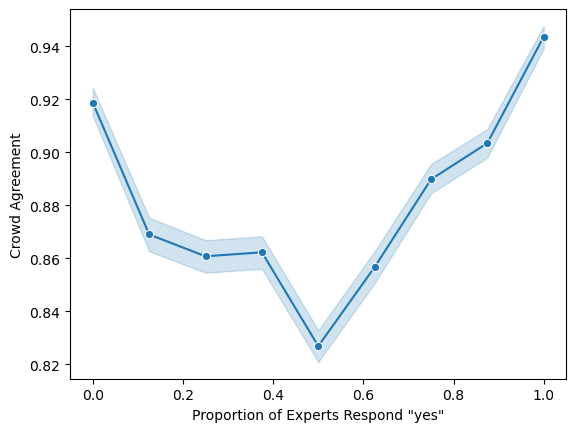

In [427]:
sns.lineplot(data = refined_data, x = '%Experts Voted Yes', y = 'Agreement', marker = 'o')
plt.xlabel('Proportion of Experts Respond "yes"')
plt.ylabel('Crowd Agreement')

Just visually, there seems to be a parabolic correlation between the two variables. There is a significant drop in agreement as the expert proportion approaches a split. Using information from "Quality Control of Crowd Labeling through Expert Evaluation" by Khattak and Salleb-Aouissi, Centaur Labs could use a form of ELICE (Expert Label Injected Crowd Estimation) that focuses their experts only on very difficult medical images. This would allow for experts to vette difficult images, while leaving the crowd to label other, easier images. I believe this will allow for Centaur Labs to cut back on costs needed to pay Experts while also giving them enough data from Readers on the easier images. As shown by the correlations, readers can be as accurate as experts, especially on the easier data.

In [428]:
expert_list = []
for i in experts:
    expert_accuracy = refined_data.loc[refined_data['%Experts Voted Yes'] == i]['Expert Accuracy'].mean()
    print('The expert accuracy at ' +str(i)+ ' proportion of experts vote yes is ' +str(expert_accuracy))
    expert_list.append(expert_accuracy)

The expert accuracy at 0.0 proportion of experts vote yes is 1.0
The expert accuracy at 0.125 proportion of experts vote yes is 0.875
The expert accuracy at 0.25 proportion of experts vote yes is 0.75
The expert accuracy at 0.375 proportion of experts vote yes is 0.625
The expert accuracy at 0.5 proportion of experts vote yes is 0.5
The expert accuracy at 0.625 proportion of experts vote yes is 0.625
The expert accuracy at 0.75 proportion of experts vote yes is 0.75
The expert accuracy at 0.875 proportion of experts vote yes is 0.875
The expert accuracy at 1.0 proportion of experts vote yes is 1.0


Here, I'll graph the Crowd Accuracy versus the Expert Accuracy in relation to the proportion of experts that responded "yes" at each interval (1/8, 2/8, etc.).

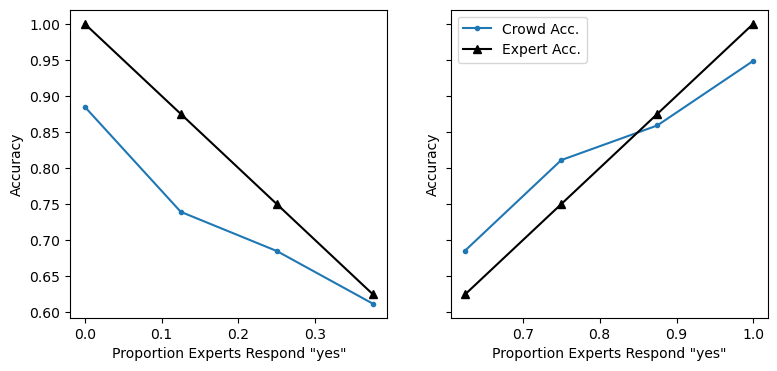

In [429]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize = (9,4))

ax1.set_xlabel('Proportion Experts Respond "yes"')
ax1.set_ylabel('Accuracy')

ax1.plot(experts[:4], crowd_list[:4], marker = '.')
ax1.plot(experts[:4], expert_list[:4], marker = '^', color = 'black')

ax2.set_xlabel('Proportion Experts Respond "yes"')
ax2.set_ylabel('Accuracy')

ax2.plot(experts[5:], crowd_list[5:], marker = '.')
ax2.plot(experts[5:], expert_list[5:], marker = '^', color = 'black')

plt.legend(['Crowd Acc.', 'Expert Acc.'])

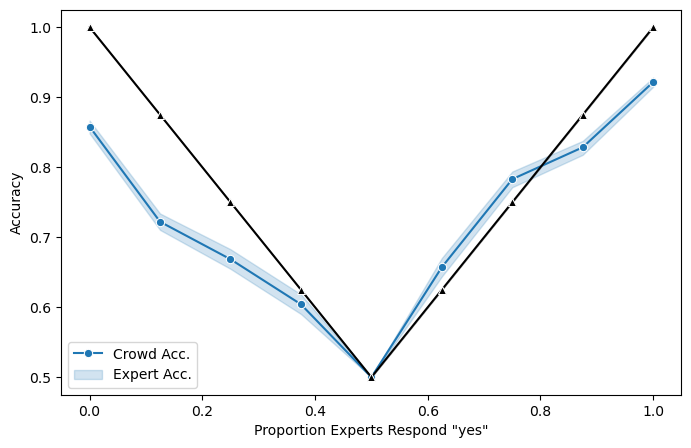

In [430]:
plt.figure(figsize = (8,5))
sns.lineplot(data = refined_data, x = '%Experts Voted Yes', y = 'Reader Accuracy', marker = 'o')
sns.lineplot(data = refined_data, x = '%Experts Voted Yes', y = 'Expert Accuracy', marker = '^', color = 'black')
plt.xlabel('Proportion Experts Respond "yes"')
plt.ylabel('Accuracy')
plt.legend(['Crowd Acc.', 'Expert Acc.'])

Note that I have ommitted the split case (Proportion 0.5) because Crowd accuracy is incalculable at that point. These graphs show that Crowd accuracy is greater than expert accuracy only at proportions of 0.625 and 0.75. 

However, what if we try putting a lower limit on the number of Qualified Readers? I test this out with the "above five readers" dataset:

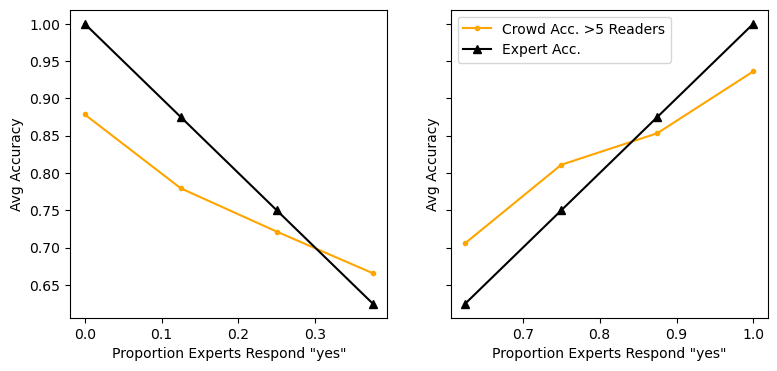

In [431]:
experts
five_readers = []
for i in experts:
    five_r_accuracy = above_five_reads.loc[above_five_reads['%Experts Voted Yes'] == i]['Reader Accuracy'].mean()
    five_readers.append(five_r_accuracy)

fig, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize = (9,4))

ax1.set_xlabel('Proportion Experts Respond "yes"')
ax1.set_ylabel('Avg Accuracy')

ax1.plot(experts[:4], five_readers[:4], marker = '.', color = 'orange')
ax1.plot(experts[:4], expert_list[:4], marker = '^', color = 'black')

ax2.set_xlabel('Proportion Experts Respond "yes"')
ax2.set_ylabel('Avg Accuracy')

ax2.plot(experts[5:], five_readers[5:], marker = '.', color = 'orange')
ax2.plot(experts[5:], expert_list[5:], marker = '^', color = 'black')

plt.legend(['Crowd Acc. >5 Readers', 'Expert Acc.'])

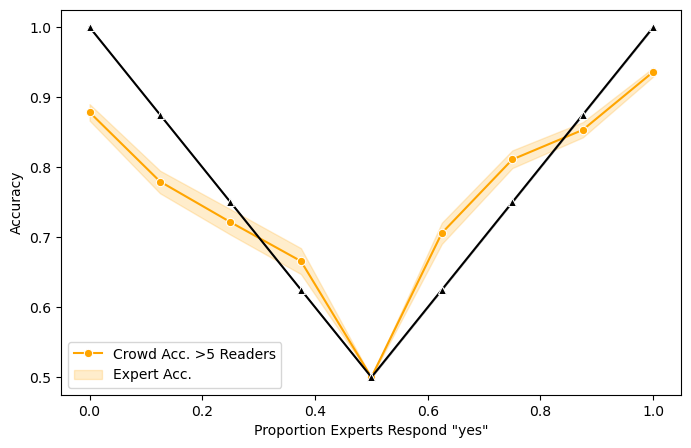

In [432]:
plt.figure(figsize = (8,5))
sns.lineplot(data = above_five_reads, x = '%Experts Voted Yes', y = 'Reader Accuracy', marker = 'o', color = 'orange')
sns.lineplot(data = above_five_reads, x = '%Experts Voted Yes', y = 'Expert Accuracy', marker = '^', color = 'black')
plt.xlabel('Proportion Experts Respond "yes"')
plt.ylabel('Accuracy')
plt.legend(['Crowd Acc. >5 Readers', 'Expert Acc.'])

The average reader accuracy at each proportion significantly increases in this case, surpassing the experts at proportions of 0.25, 0.375, 0.625, 0.75, and 0.875. As the number of Qualified Readers increases, the accuracy increases. Is there a way to gauge the threshold of Qualified Readers needed to be more accurate than experts? Let's start by plotting accuracy as a function of qualified readers. 

In [433]:
refined_data['Qualified Reads'].max()

18

In [434]:
refined_data['Qualified Reads'].unique()

array([ 2,  3,  1,  7,  4,  6,  5,  0,  8, 10,  9, 12, 11, 13, 15, 16, 18,
       14], dtype=int64)

In [435]:
for x in range(1,18):
    testd = refined_data.loc[refined_data['Qualified Reads'] == x]['Crowd Accuracy']
    print(testd.mean(), x)

0.6196928635953026 1
0.675 2
0.727344365642238 3
0.7405904890691909 4
0.7662826240300964 5
0.7565144298122723 6
0.7350760827155677 7
0.658454647256439 8
0.571301247771836 9
0.4521857923497268 10
0.35731414868105515 11
0.2714285714285714 12
0.2 13
0.16071428571428573 14
0.06060606060606061 15
0.07692307692307693 16
nan 17


We'll graph up to 16 qualified readers because the cases above that are likely very few.

In [436]:
graphingdata = refined_data['Qualified Reads']

In [437]:
grouped = refined_data.groupby('Qualified Reads')
graphingdata = grouped.mean()

In [438]:
graphingdata['Expert Accuracy'].mean()

0.6869362052191857

Here, I'll graph the Reader Accuracy and Expert Accuracy as a function of difficulty. While Expert Accuracy remains somewhat constant, Reader Accuracy is actually higher than Expert up until a 0.2 level of Difficulty.

<AxesSubplot:xlabel='Difficulty', ylabel='Reader Accuracy'>

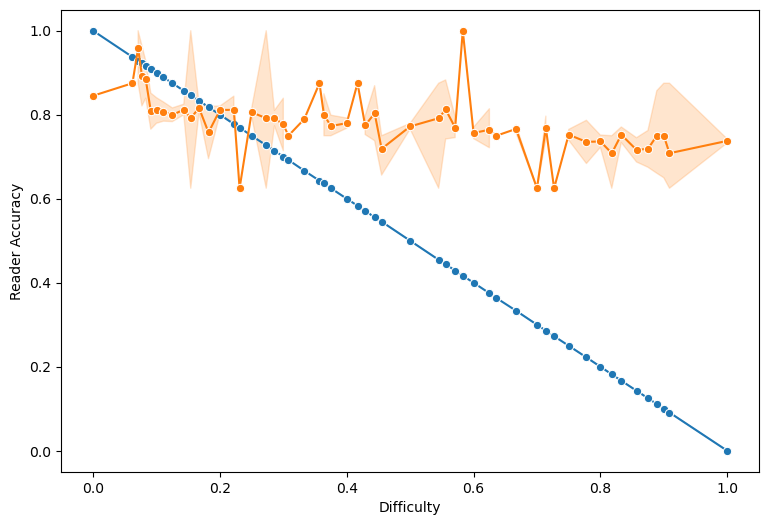

In [439]:
plt.figure(figsize = (9,6))
sns.lineplot(data = refined_data, x = 'Difficulty', y = 'Reader Accuracy', marker = 'o')
sns.lineplot(data = refined_data, x = 'Difficulty', y = 'Expert Accuracy', marker = 'o')

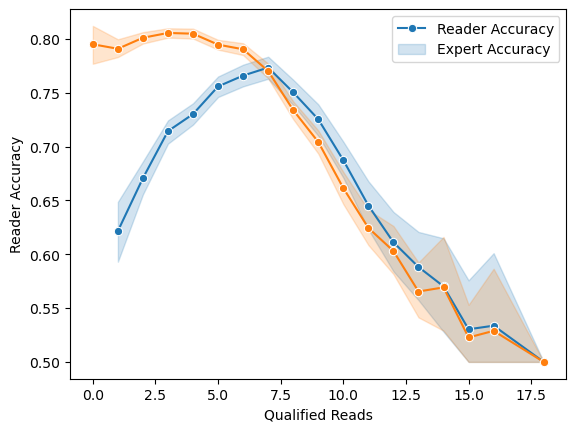

In [440]:
sns.lineplot(data = refined_data, x = 'Qualified Reads', y = 'Reader Accuracy', marker = 'o')
sns.lineplot(data = refined_data, x = 'Qualified Reads', y = 'Expert Accuracy', marker = 'o')
plt.legend(['Reader Accuracy', 'Expert Accuracy'])


From this data, we can see that readers actually seem to be more accurate after a certain number of Qualified Reads. This number appears to be about 7 Qualified Reads. This shows that it is quite important to have a high number of Qualified Reads on a case for readers to be as accurate as experts. Though it seems that accuracy goes down for both experts and readers as Qualified Reads go up, we may be able to attribute this to there simply being more Qualified Reads on the most difficult cases.

# Exploratory Data Analysis 2: Correlation

What other conclusions can we draw from the data? Using a correlation matrix, I try to see if there are any correlations between variables

<AxesSubplot:>

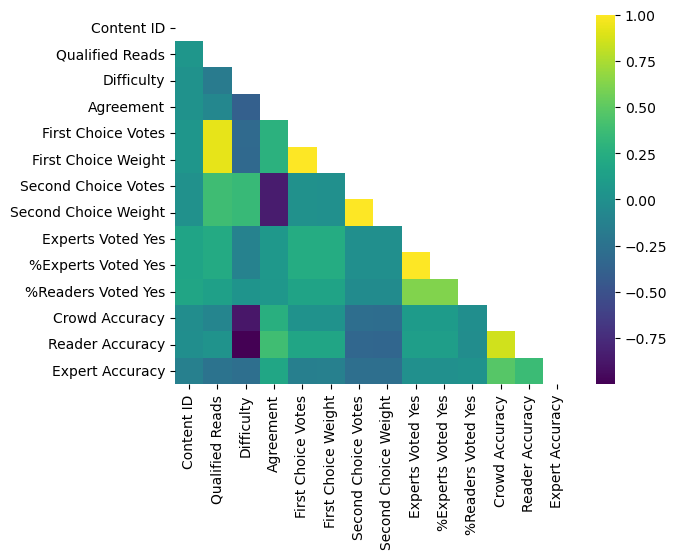

In [669]:
mask = np.triu(refined_data.corr())
sns.heatmap(refined_data.corr(), cmap = 'viridis', mask = mask)

The above correlation matrix also shows that, given a medical image, the proportion of readers that vote yes is positively correlated with the proportion of experts that vote yes. Correlation between expert votes and reader votes could mean that Qualified Readers have a significant chance of getting the right answer on a medical image.

Finally, I want a practical way to display this correlation. I'm going to start by finding the __average Qualified Readers that say yes__ at each proportion of experts. I create a DataFrame of this data to graph later.

In [442]:
experts = above_five_reads['%Experts Voted Yes'].unique()
experts.sort()

averages = []

for i in experts:
    avg = above_five_reads.loc[above_five_reads['%Experts Voted Yes'] == i]['%Readers Voted Yes'].mean()
    averages.append(avg)
    
data = {'Expert Proportions': experts,
            'Reader Avg Proportions': averages}

df = pd.DataFrame(data)

Let's use a Linear Regression to take a good look at the data and see how linear the data is.

In [443]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept = True) #lin_reg is the local name to the combination of the function and its hyperparemeters
x = df[['Expert Proportions']]
y  = df[['Reader Avg Proportions']] #double brackets necessary for dimensionality
lin_reg.fit(x, y)
x[['Expert Proportions']].min()

Expert Proportions    0.0
dtype: float64

C:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


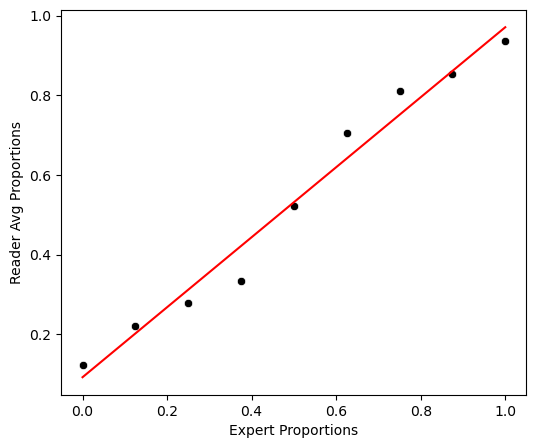

In [444]:
x_range = [x.min(), x.max()]
y_pred = lin_reg.predict(x_range)

x_range

plt.figure(figsize = (6,5))
sns.scatterplot(data = df, x = 'Expert Proportions', y = 'Reader Avg Proportions', color = 'k')
#plotting the regression
plt.plot(x_range, y_pred, label = 'Model', color = 'r')
plt.show()

In [445]:
#Retrieving the coefficient of determination for this dataset(R2)
print('The coefficient of determination of the first plot is ' + str(lin_reg.score(x,y)))

The coefficient of determination of the first plot is 0.9743521113226203


Here I'll find the Pearson coefficient as well as the p-value to determine statistical significance:

In [446]:
from scipy.stats import pearsonr
stats = pearsonr(df['Expert Proportions'], df['Reader Avg Proportions'])
print('The respective Pearson coefficient and p-value are: ' +str(stats[0]) + ', ' +str(stats[1]))

The respective Pearson coefficient and p-value are: 0.9870927572029997, 7.943131329568786e-07


The coefficients show that the line is a good model for this data, and the p-value being so close to zero tells us that the probability of this correlation happening by chance is next to zero. 

Remember: __all of this data is when there are more than 5 readers!__ This data brilliantly shows that if we take the aggregated average of the readers who respond to medical images with "yes", it correlates very well with how much experts agree. This helps us prove that readers agree with experts and are a reliable source of information.

However, just to see, let's find out what the correlation is when there are __any number of readers.__ I expect the correlation to be much lower because there must be plenty of interference from image data that just has one reader (who might've just completely missed the mark). 

In [447]:
test_averages = []

for i in experts:
    avg = refined_data.loc[refined_data['%Experts Voted Yes'] == i]['%Readers Voted Yes'].mean()
    test_averages.append(avg)
    
test_data = {'Expert Proportions': experts,
            'Reader Avg Proportions': test_averages}

test_df = pd.DataFrame(test_data)
test_df

,Expert Proportions,Reader Avg Proportions
0,0.000,0.142018
1,0.125,0.277869
2,0.250,0.331462
3,0.375,0.395844
4,0.500,0.524160
5,0.625,0.657219
6,0.750,0.782979
7,0.875,0.828461
8,1.000,0.921657


C:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


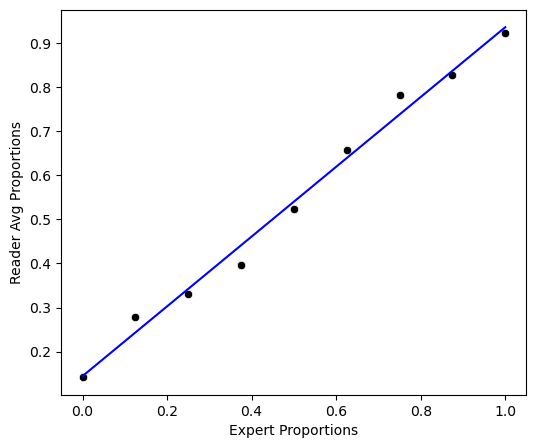

In [448]:
lin_reg = LinearRegression(fit_intercept = True) #lin_reg is the local name to the combination of the function and its hyperparemeters
a = test_df[['Expert Proportions']]
b  = test_df[['Reader Avg Proportions']] #double brackets necessary for dimensionality
lin_reg.fit(a, b)

a_range = [a.min(), a.max()]
b_pred = lin_reg.predict(a_range)

plt.figure(figsize = (6,5))
sns.scatterplot(data = test_df, x = 'Expert Proportions', y = 'Reader Avg Proportions', color = 'k')
#plotting the regression
plt.plot(a_range, b_pred, label = 'Model', color = 'b')
plt.show()

In [449]:
print('The coefficient of determination of the second plot is ' + str(lin_reg.score(a,b)))

The coefficient of determination of the second plot is 0.989458994658693


In [450]:
from scipy.stats import pearsonr
stats = pearsonr(test_df['Expert Proportions'], test_df['Reader Avg Proportions'])
print('The respective Pearson coefficient and p-value are: ' +str(stats[0]) + ', ' +str(stats[1]))

The respective Pearson coefficient and p-value are: 0.9947155345417569, 3.5140455617112675e-08


The coefficients show that this data fits almost perfectly to a positive line, and the p-value being __even closer__ to zero tells us that the probability of this correlation happening by chance is extremely small, and therefore the data is significant.

This is extremely interesting. Is there a way to explain why the correlation coefficient is much higher when we __reduce__ the threshold of readers to read a medical image? Perhaps this is due to the fact that we're taking the averages, and the averages are not proper ways to describe the distribution of the data. This may be because there are plenty of cases where the readers totally miss the mark, but because the rest of the distribution is fairly consistent, the extremes of 0% and 100% just offset the average enough so that the aggregated averages fit well enought to a linear model. 

Although there is a correlation between the _averages_ we have to remember that the average isn't representative of every individual case. Perhaps it is useful still to filter out above a certain level of Qualified Readers. 

Now, I'm going to take a look at the agreement column to see if there is a correlation between the proportion of Experts that say 'yes' and the Reader Agreement. Agreement is calculated by the number Qualified Reads that had the Majority label divided by total Reads for that label.

In [451]:
agreement = []

for i in experts:
    ag_avg = above_five_reads.loc[above_five_reads['%Experts Voted Yes'] == i]
    agreement.append(ag_avg['Agreement'].mean())
    
agrmnt_data = {'Expert Proportions': experts,
            'Agreement Avg': agreement}

agrmnt_df = pd.DataFrame(agrmnt_data)
agrmnt_df

,Expert Proportions,Agreement Avg
0,0.000,0.915589
1,0.125,0.862237
2,0.250,0.848491
3,0.375,0.850168
4,0.500,0.825736
5,0.625,0.847518
6,0.750,0.885254
7,0.875,0.906632
8,1.000,0.945969


In [452]:
refined_data.columns

Index(['Origin', 'Origin Created At', 'Content ID', 'URL', 'Labeling State',
       'Qualified Reads', 'Correct Label', 'Majority Label', 'Difficulty',
       'Agreement', 'First Choice Answer', 'First Choice Votes',
       'First Choice Weight', 'Second Choice Answer', 'Second Choice Votes',
       'Second Choice Weight', 'Comments', 'Experts Voted Yes',
       '%Experts Voted Yes', '%Readers Voted Yes', 'Crowd Accuracy',
       'Reader Accuracy', 'Expert Accuracy'],
      dtype='object')

# Machine Learning Models

In addition to the customer data, I've also been provided with an admin reads csv file which displays information regarding user identification, what problems a user worked on, their overall accuracy, chosen answers, as well as much more. I'll read that in now.

First, I'm going to prep a 'correct answer' column based off a combination of expert and user opinions. This will be part of the response training data for my supervised learning model. This involves prepping the refined_data dataset:

In [453]:
refined_data.head()

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,...,Second Choice Answer,Second Choice Votes,Second Choice Weight,Comments,Experts Voted Yes,%Experts Voted Yes,%Readers Voted Yes,Crowd Accuracy,Reader Accuracy,Expert Accuracy
Case ID,,,,,,,,,,,,,,,,,,,,,
5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,2,'no','no',0.0,1.000,...,'yes',0,0.00,[],2,0.25,0.000000,1,1.0,0.75
5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,3,'no','no',0.0,1.000,...,'yes',0,0.00,[],0,0.00,0.000000,1,1.0,1.00
5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,2,'no','no',0.0,1.000,...,'yes',0,0.00,[],0,0.00,0.000000,1,1.0,1.00
5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,1,'no','no',0.0,1.000,...,'yes',0,0.00,[],0,0.00,0.000000,1,1.0,1.00
5888091,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,7,NaN,'yes',NaN,0.571,...,'no',3,2.32,[],4,0.50,0.571429,0,0.5,0.50


In [454]:
def correct_answer(data):
    if (data['Correct Label'] == "'no'") or data['Correct Label'] == "'yes'":
        answer = data['Correct Label']
    else:
        answer = data['Majority Label']
    return answer

In [456]:
refined_data['correct answer'] = refined_data.apply(correct_answer, axis = 1)

C:\Users\micha\AppData\Local\Temp\ipykernel_186764\2636762883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data['correct answer'] = refined_data.apply(correct_answer, axis = 1)


In [550]:
Y_test = refined_data['correct answer']

Now that that's set, I'll prep the reads column:

In [457]:
reads = pd.read_csv('1345_admin_reads.csv')

In [458]:
reads.head()

,topic_id,problem_id,user_id,read_id,labeling_state,patch,score,accuracy,contest_id,mission_id,content_id,chosen_answer,origin,origin_created_at,series,series_index,answerChoiceIds,response_submitted_at,problem_appeared_at
0,1345,5888087,55058,132610888,gold_standard,NaN,100,0.78,8011,NaN,3264386,['no'],https://centaur-customer-uploads.s3.us-east-1....,2021-07-26 21:41:47.756010+00:00,NaN,NaN,[25796611],2022-04-12 09:20:24.912000+00:00,2022-04-12 09:20:24.415999+00:00
1,1345,5888087,248277,107696869,gold_standard,NaN,100,0.76,6437,NaN,3264386,['no'],https://centaur-customer-uploads.s3.us-east-1....,2021-07-26 21:41:47.756010+00:00,NaN,NaN,[25796611],2021-12-04 15:00:58.596999+00:00,2021-12-04 15:00:56.760999+00:00
2,1345,5888088,19769,60673858,gold_standard,NaN,100,0.78,5183,NaN,3264387,['no'],https://centaur-customer-uploads.s3.us-east-1....,2021-07-26 21:41:47.824498+00:00,NaN,NaN,[25796612],2021-08-09 07:41:17.754000+00:00,2021-08-09 07:41:16.961000+00:00
3,1345,5888088,237039,99676200,gold_standard,NaN,100,0.80,6151,NaN,3264387,['no'],https://centaur-customer-uploads.s3.us-east-1....,2021-07-26 21:41:47.824498+00:00,NaN,NaN,[25796612],2021-11-01 12:05:16.948999+00:00,2021-11-01 12:05:16.076000+00:00
4,1345,5888088,280445,141519169,gold_standard,NaN,100,0.76,9076,NaN,3264387,['no'],https://centaur-customer-uploads.s3.us-east-1....,2021-07-26 21:41:47.824498+00:00,NaN,NaN,[25796612],2022-06-10 12:16:45.950000+00:00,2022-06-10 12:16:45.112000+00:00


In [459]:
reads = reads[['problem_id', 'user_id', 'accuracy', 'chosen_answer']]

In [460]:
reads['user_id'].unique()

array([ 55058, 248277,  19769, ..., 272329, 270115, 152869], dtype=int64)

In [461]:
len(reads['user_id'].unique())

1034

In [462]:
df = reads.groupby('problem_id').first()

In [463]:
x_table = reads.pivot_table(index = 'problem_id', columns = 'user_id', aggfunc = 'mean')
x_table
#problem_id x user_id matrix

accuracy                                                          \
user_id      1196   1858   2581   2815   2861   7280   11697  11715  15245    
problem_id                                                                    
5888087         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888088         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888089         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888090         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888091         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...             ...    ...    ...    ...    ...    ...    ...    ...    ...   
5918374         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918375         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918376        0.76    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918377         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918379         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                   ...                                                   \
user_id    19769   ... 292079 292198 292506 292546 292650 292669 292741   
problem_id         ...                                                    
5888087       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888088      0.78  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888089       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888090       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888091      0.80  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
5918374       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918375       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918376       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918377      0.86  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918379      0.82  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                 
user_id    292812 292855 293188  
problem_id                       
5888087       NaN    NaN    NaN  
5888088       NaN    NaN    NaN  
5888089       NaN    NaN    NaN  
5888090       NaN    NaN    NaN  
5888091       NaN    NaN    NaN  
...           ...    ...    ...  
5918374       NaN    NaN    NaN  
5918375       NaN    NaN    NaN  
5918376       NaN    NaN    NaN  
5918377       NaN    NaN    NaN  
5918379       NaN    NaN    NaN  

[30013 rows x 1034 columns]

In [549]:
x_table.shape

(30013, 1035)

In [551]:
Y_test.shape

(27000,)

Y_test (my column of correct answers) does not have the same number of entires as my pivoted "x_table" does. This means that there must be problem_ids that are missing from the original data. This means we may have to extrapolate these correct answers another way. The code below confirms this, that there are more than 3000 rows that do not have an expert 'Correct Answer'. 

In [523]:
x_table.loc[x_table['correct answer'].isna()]

accuracy                                                   ...  \
user_id        1196 1858 2581 2815 2861 7280 11697 11715 15245 19769  ...   
problem_id                                                            ...   
5888145        0.82  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888170        0.80  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888179         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888183         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888192         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
...             ...  ...  ...  ...  ...  ...   ...   ...   ...   ...  ...   
5892281        0.88  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5892282        0.80  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5892297         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5892315         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.78  ...   
5892385         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   

                                                                           \
user_id    292198 292506 292546 292650 292669 292741 292812 292855 293188   
problem_id                                                                  
5888145       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888170       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888179       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888183       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888192       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
5892281       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5892282       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5892297       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5892315       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5892385       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

           correct answer  
user_id                    
problem_id                 
5888145               NaN  
5888170               NaN  
5888179               NaN  
5888183               NaN  
5888192               NaN  
...                   ...  
5892281               NaN  
5892282               NaN  
5892297               NaN  
5892315               NaN  
5892385               NaN  

[3255 rows x 1035 columns]

In [544]:
xindeces = list(x_table.loc[x_table['correct answer'].isna()].index)
refinedindeces = list(refined_data.index)
check =  any(item in refinedindeces for item in xindeces)
check
#none of the indeces where the correct answer is NaN are in the refined_data dataframe

False

How do we go about fixing this?

### Extrapolating a 'correct answer' column

I need to extrapolate a 'correct answer' column based on the data that I have here. I'll try doing that by performing a value_counts() on each grouping of problem_id. Whichever value_count is the highest for that respective id ('yes' or 'no'), then that is the correct answer.

In [464]:
variable = reads['chosen_answer'].value_counts()
print(variable)
#seeing how this works
variable.index[0]

['yes']    79685
['no']     72375
Name: chosen_answer, dtype: int64


"['yes']"

In [532]:
x_subset = x_table.loc[x_table['correct answer'].isna()]
x_subset.index

Int64Index([5888145, 5888170, 5888179, 5888183, 5888192, 5888194, 5888217,
            5888230, 5888231, 5888232,
            ...
            5892231, 5892236, 5892240, 5892255, 5892280, 5892281, 5892282,
            5892297, 5892315, 5892385],
           dtype='int64', name='problem_id', length=3255)

In [538]:
reads_subset = reads[reads['problem_id'].isin(list(x_subset.index))]

In [539]:
reads_subset

,problem_id,user_id,accuracy,chosen_answer
241,5888145,1196,0.82,['yes']
242,5888145,130978,0.78,['yes']
243,5888145,134562,0.76,['yes']
244,5888145,152121,0.80,['yes']
245,5888145,233881,0.76,['no']
...,...,...,...,...
18365,5892315,245612,0.82,['no']
18680,5892385,128872,0.82,['no']
18681,5892385,148435,0.82,['no']
18682,5892385,250601,0.86,['no']


In [540]:
group = reads_subset.groupby('problem_id')

In [541]:
def max_answer(groupby): 
    unique_list = groupby['chosen_answer'].value_counts()
    answer = unique_list.index[0]
    return answer

In [542]:
Y_subset = group.apply(max_answer)

In [552]:
Y_test

Case ID
5888087     'no'
5888088     'no'
5888089     'no'
5888090     'no'
5888091    'yes'
           ...  
5918375     'no'
5918376     'no'
5918377    'yes'
5918378    'yes'
5918379    'yes'
Name: correct answer, Length: 27000, dtype: object

In [558]:
Y_subset

problem_id
5888145    ['yes']
5888170     ['no']
5888179     ['no']
5888183     ['no']
5888192    ['yes']
            ...   
5892281     ['no']
5892282     ['no']
5892297     ['no']
5892315     ['no']
5892385     ['no']
Length: 3255, dtype: object

In [591]:
Y_subset = Y_subset.str.strip('[]')

In [593]:
Y_subset

problem_id
5888145    'yes'
5888170     'no'
5888179     'no'
5888183     'no'
5888192    'yes'
           ...  
5892281     'no'
5892282     'no'
5892297     'no'
5892315     'no'
5892385     'no'
Length: 3255, dtype: object

In [608]:
Y_full = Y_test.append(Y_subset)
Y_full.index

C:\Users\micha\AppData\Local\Temp\ipykernel_186764\891181881.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Y_full = Y_test.append(Y_subset)


Int64Index([5888087, 5888088, 5888089, 5888090, 5888091, 5888092, 5888093,
            5888094, 5888095, 5888096,
            ...
            5892231, 5892236, 5892240, 5892255, 5892280, 5892281, 5892282,
            5892297, 5892315, 5892385],
           dtype='int64', length=30255)

In [594]:
x_table['correct answer'] = Y_full

In [595]:
x_table.loc[x_table['correct answer'].isna()]

Empty DataFrame
Columns: [(accuracy, 1196), (accuracy, 1858), (accuracy, 2581), (accuracy, 2815), (accuracy, 2861), (accuracy, 7280), (accuracy, 11697), (accuracy, 11715), (accuracy, 15245), (accuracy, 19769), (accuracy, 21682), (accuracy, 30879), (accuracy, 32053), (accuracy, 37193), (accuracy, 38179), (accuracy, 41816), (accuracy, 42266), (accuracy, 43096), (accuracy, 44164), (accuracy, 44512), (accuracy, 44529), (accuracy, 45825), (accuracy, 46115), (accuracy, 46403), (accuracy, 46967), (accuracy, 47705), (accuracy, 48054), (accuracy, 48437), (accuracy, 48870), (accuracy, 49472), (accuracy, 49560), (accuracy, 50205), (accuracy, 50342), (accuracy, 50420), (accuracy, 51197), (accuracy, 52355), (accuracy, 52785), (accuracy, 52882), (accuracy, 52979), (accuracy, 53036), (accuracy, 53129), (accuracy, 53717), (accuracy, 53744), (accuracy, 53789), (accuracy, 54178), (accuracy, 54870), (accuracy, 54890), (accuracy, 55058), (accuracy, 55188), (accuracy, 55386), (accuracy, 55411), (accuracy, 55422), (accuracy, 55602), (accuracy, 55669), (accuracy, 55672), (accuracy, 56746), (accuracy, 56959), (accuracy, 57188), (accuracy, 57507), (accuracy, 57749), (accuracy, 57851), (accuracy, 62640), (accuracy, 62945), (accuracy, 63450), (accuracy, 63821), (accuracy, 64460), (accuracy, 64472), (accuracy, 64485), (accuracy, 64513), (accuracy, 64625), (accuracy, 64667), (accuracy, 64701), (accuracy, 64885), (accuracy, 65046), (accuracy, 65094), (accuracy, 65129), (accuracy, 65244), (accuracy, 65368), (accuracy, 65588), (accuracy, 65621), (accuracy, 65699), (accuracy, 65854), (accuracy, 66136), (accuracy, 66589), (accuracy, 66654), (accuracy, 67217), (accuracy, 67350), (accuracy, 67615), (accuracy, 67879), (accuracy, 68333), (accuracy, 68409), (accuracy, 68904), (accuracy, 69061), (accuracy, 69599), (accuracy, 71806), (accuracy, 71885), (accuracy, 78505), (accuracy, 80367), (accuracy, 84307), (accuracy, 84759), ...]
Index: []

[0 rows x 1035 columns]

We've succeeded in providing for all problem_ids that were NaN by using Y_subset. Now we have a full column for our response variable.

### One-Hot Encoding

I've successfully created a 'correct answer' column, which can be seen in the x_table dataframe. However, I will need to one-hot encode this in order to use it in a ML model. This means assigning values of 0 and 1 to 'no' and 'yes' respectively. This is easy because 'no' and 'yes' are binary variables.

In [637]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [638]:
Y_encoded = le.fit_transform(Y_full)

In [639]:
Y_encoded = pd.Series(Y_encoded, index = Y_full.index)

In [640]:
Y_encoded.drop(Y_encoded.index.difference(x_table.index), inplace = True)
#Dropped all indeces from encoded that are not in the full dataframe

In [641]:
Y_encoded

5888087    0
5888088    0
5888089    0
5888090    0
5888091    1
          ..
5892281    0
5892282    0
5892297    0
5892315    0
5892385    0
Length: 30013, dtype: int32

In [642]:
x_table['correct answer'].value_counts()

0    16181
1    13832
Name: correct answer, dtype: int64

Creating encoded 'correct answer' column for x_table dataset:

In [643]:
x_table['correct answer'] = Y_encoded

In [644]:
x_table

accuracy                                                   ...  \
user_id        1196 1858 2581 2815 2861 7280 11697 11715 15245 19769  ...   
problem_id                                                            ...   
5888087         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888088         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.78  ...   
5888089         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888090         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888091         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.80  ...   
...             ...  ...  ...  ...  ...  ...   ...   ...   ...   ...  ...   
5918374         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5918375         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5918376        0.76  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5918377         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.86  ...   
5918379         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.82  ...   

                                                                           \
user_id    292198 292506 292546 292650 292669 292741 292812 292855 293188   
problem_id                                                                  
5888087       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888088       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888089       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888090       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888091       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
5918374       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918375       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918376       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918377       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918379       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

           correct answer  
user_id                    
problem_id                 
5888087                 0  
5888088                 0  
5888089                 0  
5888090                 0  
5888091                 1  
...                   ...  
5918374                 1  
5918375                 0  
5918376                 0  
5918377                 1  
5918379                 1  

[30013 rows x 1035 columns]

In [645]:
x_table.loc[x_table['correct answer'].isna()]

Empty DataFrame
Columns: [(accuracy, 1196), (accuracy, 1858), (accuracy, 2581), (accuracy, 2815), (accuracy, 2861), (accuracy, 7280), (accuracy, 11697), (accuracy, 11715), (accuracy, 15245), (accuracy, 19769), (accuracy, 21682), (accuracy, 30879), (accuracy, 32053), (accuracy, 37193), (accuracy, 38179), (accuracy, 41816), (accuracy, 42266), (accuracy, 43096), (accuracy, 44164), (accuracy, 44512), (accuracy, 44529), (accuracy, 45825), (accuracy, 46115), (accuracy, 46403), (accuracy, 46967), (accuracy, 47705), (accuracy, 48054), (accuracy, 48437), (accuracy, 48870), (accuracy, 49472), (accuracy, 49560), (accuracy, 50205), (accuracy, 50342), (accuracy, 50420), (accuracy, 51197), (accuracy, 52355), (accuracy, 52785), (accuracy, 52882), (accuracy, 52979), (accuracy, 53036), (accuracy, 53129), (accuracy, 53717), (accuracy, 53744), (accuracy, 53789), (accuracy, 54178), (accuracy, 54870), (accuracy, 54890), (accuracy, 55058), (accuracy, 55188), (accuracy, 55386), (accuracy, 55411), (accuracy, 55422), (accuracy, 55602), (accuracy, 55669), (accuracy, 55672), (accuracy, 56746), (accuracy, 56959), (accuracy, 57188), (accuracy, 57507), (accuracy, 57749), (accuracy, 57851), (accuracy, 62640), (accuracy, 62945), (accuracy, 63450), (accuracy, 63821), (accuracy, 64460), (accuracy, 64472), (accuracy, 64485), (accuracy, 64513), (accuracy, 64625), (accuracy, 64667), (accuracy, 64701), (accuracy, 64885), (accuracy, 65046), (accuracy, 65094), (accuracy, 65129), (accuracy, 65244), (accuracy, 65368), (accuracy, 65588), (accuracy, 65621), (accuracy, 65699), (accuracy, 65854), (accuracy, 66136), (accuracy, 66589), (accuracy, 66654), (accuracy, 67217), (accuracy, 67350), (accuracy, 67615), (accuracy, 67879), (accuracy, 68333), (accuracy, 68409), (accuracy, 68904), (accuracy, 69061), (accuracy, 69599), (accuracy, 71806), (accuracy, 71885), (accuracy, 78505), (accuracy, 80367), (accuracy, 84307), (accuracy, 84759), ...]
Index: []

[0 rows x 1035 columns]

### Merging

Here I'm going to merge reads and the customer data into one dataframe:

In [646]:
merged_data = pd.merge(refined_data, reads, how = 'right', right_on = 'problem_id', left_on = refined_data.index)

In [647]:
merged_data.set_index('user_id', inplace = True)

In [648]:
merged_data.head()

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,...,Experts Voted Yes,%Experts Voted Yes,%Readers Voted Yes,Crowd Accuracy,Reader Accuracy,Expert Accuracy,correct answer,problem_id,accuracy,chosen_answer
user_id,,,,,,,,,,,,,,,,,,,,,
55058,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386.0,https://go.centaurlabs.com/problem/5888087,Gold Standard,2.0,'no','no',0.0,1.0,...,2.0,0.25,0.0,1.0,1.0,0.75,'no',5888087,0.78,['no']
248277,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386.0,https://go.centaurlabs.com/problem/5888087,Gold Standard,2.0,'no','no',0.0,1.0,...,2.0,0.25,0.0,1.0,1.0,0.75,'no',5888087,0.76,['no']
19769,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387.0,https://go.centaurlabs.com/problem/5888088,Gold Standard,3.0,'no','no',0.0,1.0,...,0.0,0.00,0.0,1.0,1.0,1.00,'no',5888088,0.78,['no']
237039,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387.0,https://go.centaurlabs.com/problem/5888088,Gold Standard,3.0,'no','no',0.0,1.0,...,0.0,0.00,0.0,1.0,1.0,1.00,'no',5888088,0.80,['no']
280445,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387.0,https://go.centaurlabs.com/problem/5888088,Gold Standard,3.0,'no','no',0.0,1.0,...,0.0,0.00,0.0,1.0,1.0,1.00,'no',5888088,0.76,['no']


## Feature Importance Matrix Model

In [649]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_table.drop('correct answer', axis = 1), Y_encoded, stratify=Y_encoded, random_state=42)

In [650]:
X_train.fillna(0, inplace = True)

In [651]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(x_table.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


(22509, 1034)
(7504, 1034)
(22509,)
(7504,)


Shapes are the same size, we're good to go for Machine Learning.

In [660]:
importances = forest.feature_importances_
importances.max()
reads['user_id'].value_counts()

19769     9228
245612    5672
118064    4481
1196      4298
123180    3109
          ... 
267439       1
264827       1
152115       1
192571       1
152869       1
Name: user_id, Length: 1034, dtype: int64

In [662]:
forest_importances = pd.Series(importances, index=x_table.drop('correct answer', axis = 1).columns)
forest_importances.sort_values(ascending = False, inplace = True)
ltd_importances = forest_importances[:50]

std = np.std([tree.feature_importances_[:50] for tree in forest.estimators_[:50]], axis=0)

Here, I'll plot the 50 most important features, identified by user ID. These must be the users that have the most sway in deciding a correct answer.

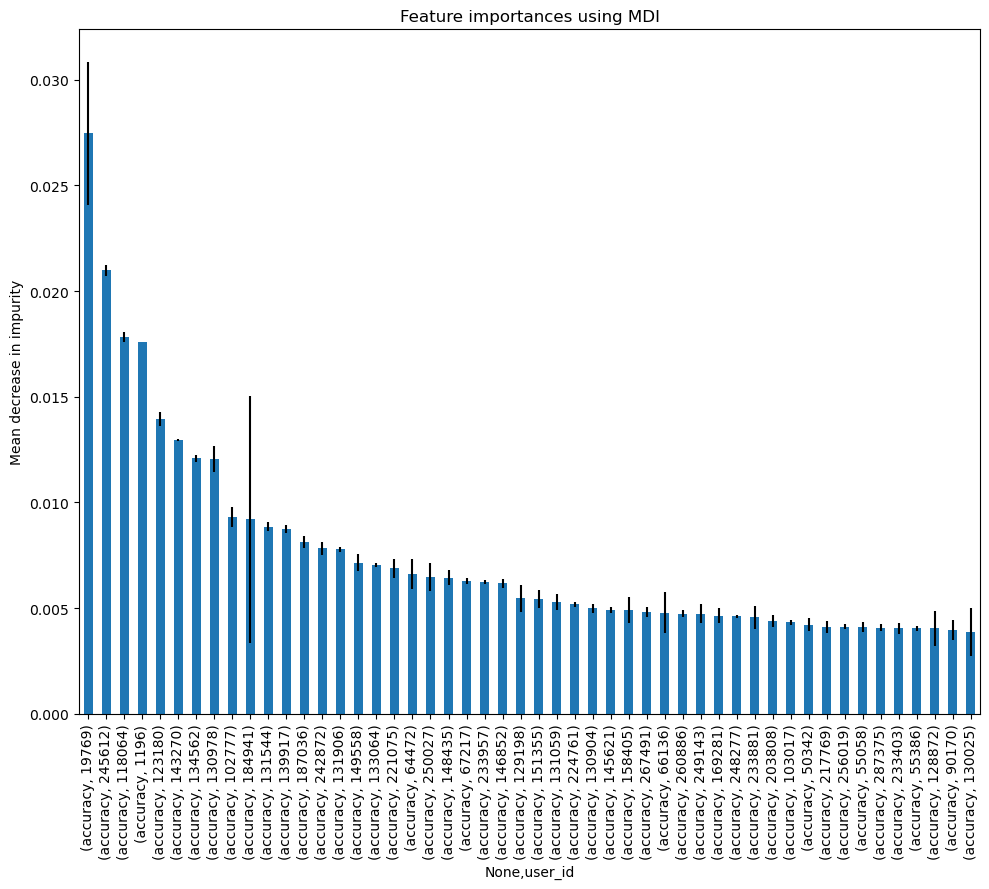

In [664]:
fig, ax = plt.subplots(figsize = (10,9))
ltd_importances.plot.bar(yerr = std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Here we've identified what users are the most important to producing the correct answer. Let's see if there is a way to identify how many users we can cut back on to still get the correct chosen_answer.

## Feature Importance on Full DataFrame (all features)

In [125]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [153]:
merged_data['correct answer'] = le.fit_transform(merged_data['correct answer'])

In [155]:
merged_data

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,...,Experts Voted Yes,%Experts Voted Yes,%Readers Voted Yes,Crowd Accuracy,Reader Accuracy,Expert Accuracy,correct answer,problem_id,accuracy,chosen_answer
user_id,,,,,,,,,,,,,,,,,,,,,
55058,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386.0,https://go.centaurlabs.com/problem/5888087,Gold Standard,2.0,'no','no',0.0,1.0,...,2.0,0.250,0.0,1.0,1.0,0.750,0,5888087,0.78,['no']
248277,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386.0,https://go.centaurlabs.com/problem/5888087,Gold Standard,2.0,'no','no',0.0,1.0,...,2.0,0.250,0.0,1.0,1.0,0.750,0,5888087,0.76,['no']
19769,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387.0,https://go.centaurlabs.com/problem/5888088,Gold Standard,3.0,'no','no',0.0,1.0,...,0.0,0.000,0.0,1.0,1.0,1.000,0,5888088,0.78,['no']
237039,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387.0,https://go.centaurlabs.com/problem/5888088,Gold Standard,3.0,'no','no',0.0,1.0,...,0.0,0.000,0.0,1.0,1.0,1.000,0,5888088,0.80,['no']
280445,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387.0,https://go.centaurlabs.com/problem/5888088,Gold Standard,3.0,'no','no',0.0,1.0,...,0.0,0.000,0.0,1.0,1.0,1.000,0,5888088,0.76,['no']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19769,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294678.0,https://go.centaurlabs.com/problem/5918379,Gold Standard,5.0,'yes','yes',0.2,0.8,...,5.0,0.625,0.8,1.0,0.8,0.625,0,5918379,0.82,['yes']
53129,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294678.0,https://go.centaurlabs.com/problem/5918379,Gold Standard,5.0,'yes','yes',0.2,0.8,...,5.0,0.625,0.8,1.0,0.8,0.625,0,5918379,0.78,['yes']
102777,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294678.0,https://go.centaurlabs.com/problem/5918379,Gold Standard,5.0,'yes','yes',0.2,0.8,...,5.0,0.625,0.8,1.0,0.8,0.625,0,5918379,0.84,['yes']


In [154]:
merged_data.columns

Index(['Origin', 'Origin Created At', 'Content ID', 'URL', 'Labeling State',
       'Qualified Reads', 'Correct Label', 'Majority Label', 'Difficulty',
       'Agreement', 'First Choice Answer', 'First Choice Votes',
       'First Choice Weight', 'Second Choice Answer', 'Second Choice Votes',
       'Second Choice Weight', 'Comments', 'Experts Voted Yes',
       '%Experts Voted Yes', '%Readers Voted Yes', 'Crowd Accuracy',
       'Reader Accuracy', 'Expert Accuracy', 'correct answer', 'problem_id',
       'accuracy', 'chosen_answer'],
      dtype='object')

In [156]:
test_x = merged_data[['Qualified Reads', 'Difficulty', 'Agreement', 'First Choice Votes','First Choice Weight', 'Second Choice Votes', 'Second Choice Weight', '%Experts Voted Yes', '%Readers Voted Yes', 'Reader Accuracy', 'Expert Accuracy', 'accuracy']]

In [158]:
test_x.dtypes

Qualified Reads         float64
Difficulty              float64
Agreement               float64
First Choice Votes      float64
First Choice Weight     float64
Second Choice Votes     float64
Second Choice Weight    float64
%Experts Voted Yes      float64
%Readers Voted Yes      float64
Reader Accuracy         float64
Expert Accuracy         float64
accuracy                float64
dtype: object

I have my test dataframe, and the values are all numerical, so we can now try modeling.

In [159]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(test_x, merged_data['correct answer'], stratify=merged_data['correct answer'], random_state=42)

In [162]:
X2_train.fillna(0, inplace = True) #double check if we should fill with zeros

In [163]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(test_x.shape[1])]
second_forest = RandomForestClassifier(random_state=0)
second_forest.fit(X2_train, y2_train)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(114045, 12)
(38015, 12)
(114045,)
(38015,)


Same sizes, ready for modeling.

In [164]:
importances_two = second_forest.feature_importances_

In [173]:
test2_forest_importances = pd.Series(importances_two, index=test_x.columns)
test2_forest_importances.sort_values(ascending = False, inplace = True)

std2 = np.std([tree.feature_importances_ for tree in second_forest.estimators_], axis=0)
test2_forest_importances

Expert Accuracy         0.230951
Qualified Reads         0.207342
First Choice Weight     0.161435
Agreement               0.157503
First Choice Votes      0.137101
Reader Accuracy         0.053549
%Experts Voted Yes      0.036494
%Readers Voted Yes      0.012427
Difficulty              0.001759
Second Choice Votes     0.001439
Second Choice Weight    0.000000
accuracy                0.000000
dtype: float64

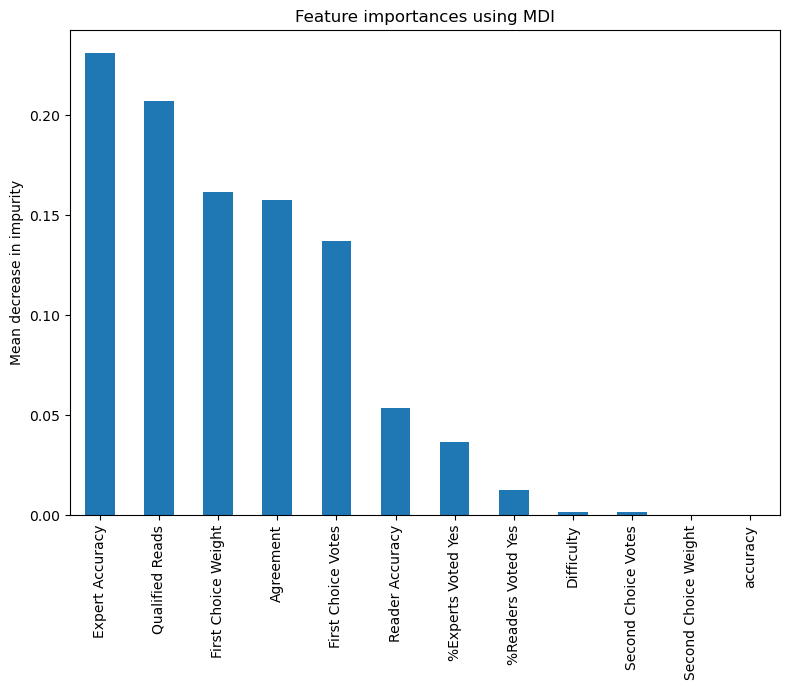

In [174]:
fig, ax = plt.subplots(figsize = (8,7))
test2_forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
#yerr = std2